In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/extract.csv", index_col=0, header=0, names=['CreateDate', 'ClosedDate', 'Agency', 'AgencyName',
       'ComplaintType', 'Descriptor', 'LocationType', 'IncidentZip',
       'IncidentAddress', 'StreetName', 'CrossStreet1', 'CrossStreet2',
       'IntersectionStreet1', 'IntersectionStreet2', 'AddressType',
       'City', 'Landmark', 'FacilityType', 'Status', 'DueDate',
       'ResolutionDescription', 'ResolutionActionUpdatedDate',
       'CommunityBoard', 'BBL', 'Borough', 'XCoordinate',
       'YCoordinate', 'OpenDataChannelType',
       'ParkFacilityName', 'ParkBorough', 'VehicleType',
       'TaxiCompanyBorough', 'TaxiPickUpLocation', 'BridgeHighwayName',
       'BridgeHighwayDirection', 'RoadRamp', 'BridgeHighwaySegment',
       'Latitude', 'Longitude', 'Location'])
df.head()

/home/julien/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


CreateDate              ClosedDate Agency  \
24309212  11/03/2012 12:00:00 AM  11/07/2012 12:00:00 AM    HPD   
21430983  09/13/2011 08:40:00 AM  09/13/2011 01:30:00 PM    DOT   
38035027  12/28/2017 08:40:46 AM  12/29/2017 11:49:46 AM    HPD   
16381552  04/04/2010 11:25:55 PM  04/08/2010 12:00:00 AM    DOB   
40325299  09/19/2018 01:02:40 PM  09/19/2018 03:41:45 PM    DOF   

                                                 AgencyName  \
24309212  Department of Housing Preservation and Develop...   
21430983                       Department of Transportation   
38035027  Department of Housing Preservation and Develop...   
16381552                            Department of Buildings   
40325299                     Adjudication - Hearing by Mail   

                          ComplaintType  \
24309212                        HEATING   
21430983       Traffic Signal Condition   
38035027                 HEAT/HOT WATER   
16381552  General Construction/Plumbing   
40325299     DOF Parking - Request Copy   

                                        Descriptor          LocationType  \
24309212                                      HEAT  RESIDENTIAL BUILDING   
21430983                                Controller                   NaN   
38035027                            APARTMENT ONLY  RESIDENTIAL BUILDING   
16381552  Debris - Falling Or In Danger Of Falling                   NaN   
40325299                           Image of Ticket                   NaN   

         IncidentZip         IncidentAddress         StreetName  ...  \
24309212       10075      308 EAST 80 STREET     EAST 80 STREET  ...   
21430983         NaN                     NaN                NaN  ...   
38035027       10467  3377 WHITE PLAINS ROAD  WHITE PLAINS ROAD  ...   
16381552       10009            225 AVENUE B           AVENUE B  ...   
40325299         NaN                     NaN                NaN  ...   

         VehicleType TaxiCompanyBorough TaxiPickUpLocation BridgeHighwayName  \
24309212         NaN                NaN                NaN               NaN   
21430983         NaN                NaN                NaN               NaN   
38035027         NaN                NaN                NaN               NaN   
16381552         NaN                NaN                NaN               NaN   
40325299         NaN                NaN                NaN               NaN   

         BridgeHighwayDirection RoadRamp BridgeHighwaySegment   Latitude  \
24309212                    NaN      NaN                  NaN  40.773824   
21430983                    NaN      NaN                  NaN        NaN   
38035027                    NaN      NaN                  NaN  40.874872   
16381552                    NaN      NaN                  NaN  40.729061   
40325299                    NaN      NaN                  NaN        NaN   

          Longitude                                 Location  
24309212 -73.954111  (40.77382381576739, -73.95411117806607)  
21430983        NaN                                      NaN  
38035027 -73.867060  (40.87487170961045, -73.86706003035614)  
16381552 -73.978287   (40.72906133724778, -73.9782869065312)  
40325299        NaN                                      NaN  

[5 rows x 40 columns]

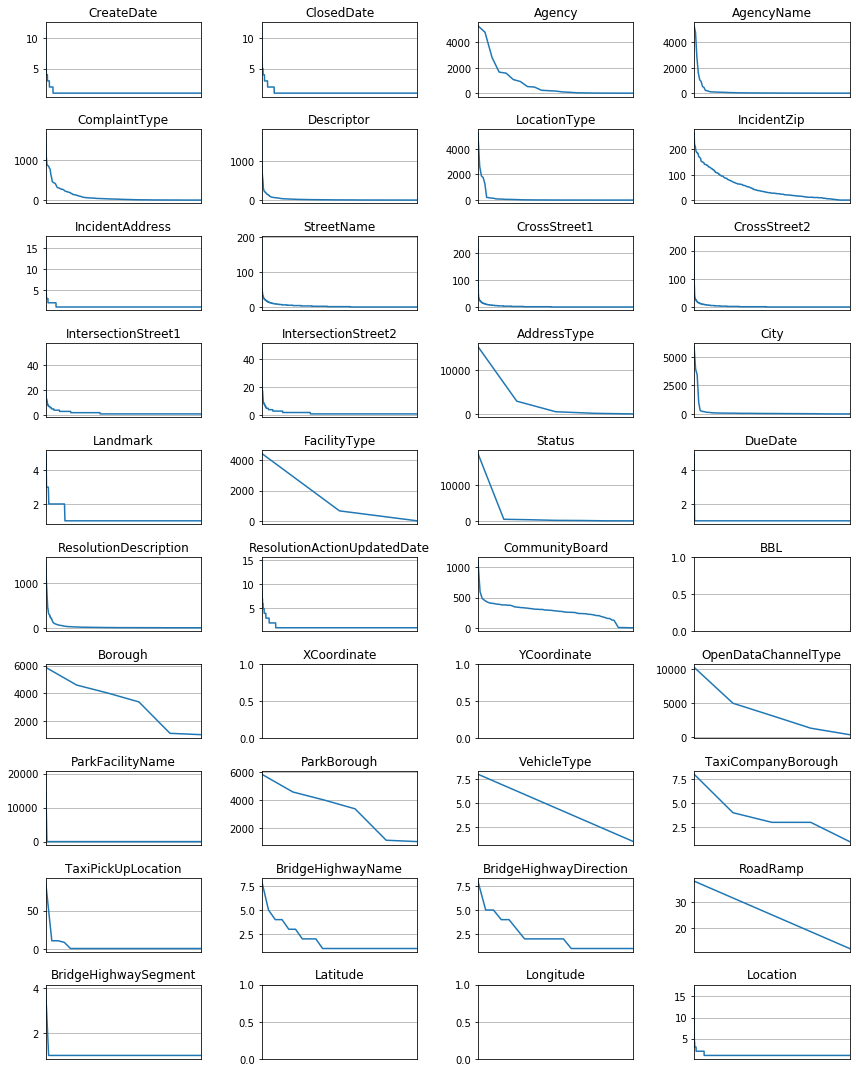

In [3]:
plt.figure(figsize=(12, 15))
plt.title("Value counts")
for i, col in enumerate(df.columns):
    plt.subplot(10, 4, i+1)
    if df[col].dtype == object:
        df[col].value_counts().plot()
    plt.grid()
    plt.xticks([])
    plt.title(col)
plt.tight_layout()
plt.show()

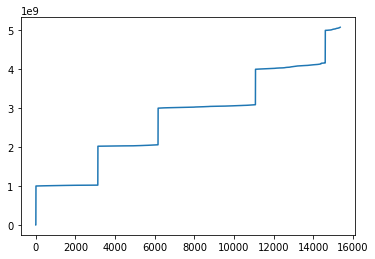

In [4]:
plt.plot(sorted(df.BBL.dropna().values))

In [5]:
df.columns

Index(['CreateDate', 'ClosedDate', 'Agency', 'AgencyName', 'ComplaintType',
       'Descriptor', 'LocationType', 'IncidentZip', 'IncidentAddress',
       'StreetName', 'CrossStreet1', 'CrossStreet2', 'IntersectionStreet1',
       'IntersectionStreet2', 'AddressType', 'City', 'Landmark',
       'FacilityType', 'Status', 'DueDate', 'ResolutionDescription',
       'ResolutionActionUpdatedDate', 'CommunityBoard', 'BBL', 'Borough',
       'XCoordinate', 'YCoordinate', 'OpenDataChannelType', 'ParkFacilityName',
       'ParkBorough', 'VehicleType', 'TaxiCompanyBorough',
       'TaxiPickUpLocation', 'BridgeHighwayName', 'BridgeHighwayDirection',
       'RoadRamp', 'BridgeHighwaySegment', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [6]:
df['ComplaintType'].value_counts()

Noise - Residential                      1697
HEAT/HOT WATER                           1077
Street Condition                          871
Street Light Condition                    868
Illegal Parking                           857
                                         ... 
HEAP Assistance                             1
Poison Ivy                                  1
Day Care                                    1
Home Delivered Meal - Missed Delivery       1
Advocate - Other                            1
Name: ComplaintType, Length: 207, dtype: int64

In [7]:
import folium
from folium.plugins import MarkerCluster
import os

In [8]:
m = folium.Map(zoom_start=5)
marker_cluster = MarkerCluster().add_to(m)
def plotDot(point):
    '''input: series that contains a numeric named latitude and a numeric named longitude
    this function creates a CircleMarker and adds it to your this_map'''
    folium.Marker(
        location=[point.Latitude, point.Longitude],
        popup=point.Descriptor,
        icon=folium.Icon(color='green', icon='ok-sign')
    ).add_to(marker_cluster)

In [9]:
df[df.Longitude.notnull()].apply(plotDot, axis=1)
m.save('simple_dot_plot.html')

## Borough

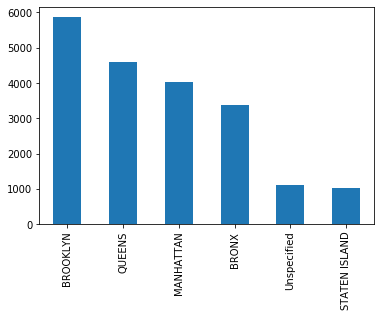

In [10]:
df.Borough.value_counts().plot(kind="bar")

In [11]:
borough = f'data/Neighborhood Tabulation Areas.geojson'
m = folium.Map(
#     tiles='Mapbox Bright',
    zoom_start=2  # Limited levels of zoom for free Mapbox tiles.
)
fg=folium.FeatureGroup(name="Pika")
folium.GeoJson(
    borough,
    name='geojson'
).add_to(m)
m.save("Borough.html")
m